# Credit Card Fraud Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file_path = '/content/drive/My Drive/creditcard.csv'

### First I have imported the dataset from the drive by mounting it

In [ ]:
df = pd.read_csv(csv_file_path)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Then I found the shape of the dataset

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Then I found that there are no null values which is a + point for us

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].nunique()

2

#### There are 2 unique values in the class column
--> 0 - Genuine
--> 1 - Fraudent

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
df['Class'].value_counts(normalize = True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train['Time'].describe()

count    227845.000000
mean      94832.242876
std       47500.701858
min           0.000000
25%       54202.000000
50%       84737.000000
75%      139337.000000
max      172792.000000
Name: Time, dtype: float64

### Lets first observe the Time

In [ ]:
X_train.Time = X_train.Time/3600
X_test.Time = X_test.Time/3600

#### We converted the time which was in seconds into hours

In [ ]:
X_train['Time'].describe()

count    227845.000000
mean         26.342290
std          13.194639
min           0.000000
25%          15.056111
50%          23.538056
75%          38.704722
max          47.997778
Name: Time, dtype: float64

The minimum and maximum time of the transactions in hours is 0.00 and 47.99

Now lets find out it according to days

In [ ]:
X_train.Time.min()/24

0.0

In [ ]:
X_train.Time.max()/24

1.9999074074074075

Here we can see that the dataset is a 2 days observation

<ipython-input-19-75ea51c32ebd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.Time, bins=48, kde=False)


Text(0.5, 1.0, 'Transaction Times')

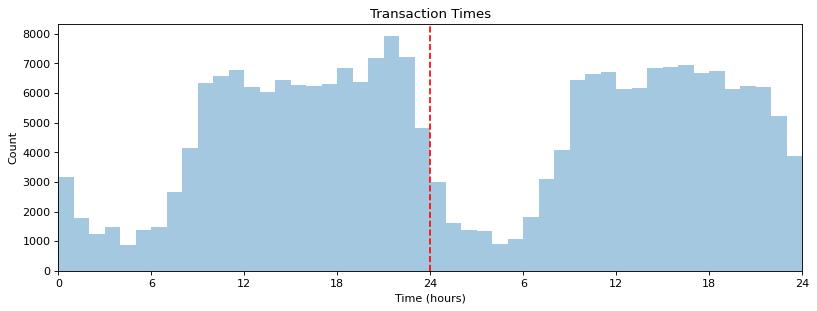

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train.Time, bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,49,6), np.hstack((np.arange(0, 30, 6), np.arange(6, 30, 6))).astype(str))
plt.axvline(x=24, color='r', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Transaction Times')

#### Here we can clearly see that most of the transactions occured between 6:30 am to 11:30 pm. Some people may went for the morning coffee or breakfast

### Now lets observe the Amount

In [ ]:
X_train['Amount'].describe()

count    227845.000000
mean         88.630203
std         248.037789
min           0.000000
25%           5.690000
50%          22.000000
75%          77.600000
max       19656.530000
Name: Amount, dtype: float64

#### The average amount transactions is Rs. 88 and the maximum amount transfered is 19656 which I think it must be an outlier I guess, coze there will be almost 1 or 2 transactions which will be transfering this much of amount.

<ipython-input-21-e939dd81d153>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Amount'], bins = 30, kde = False)


Text(0.5, 1.0, 'Amount')

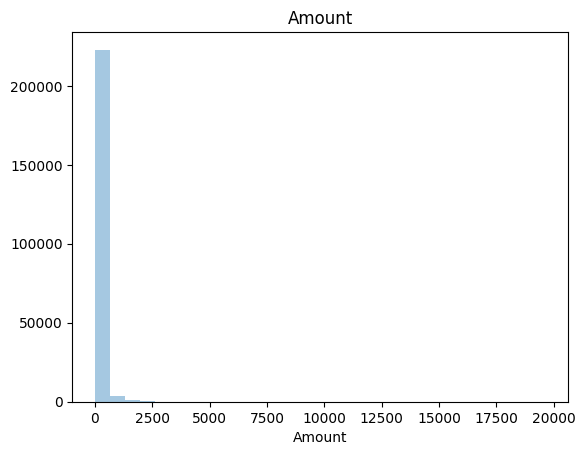

In [ ]:
sns.distplot(X_train['Amount'], bins = 30, kde = False)
plt.title('Amount')

<Axes: xlabel='Amount'>

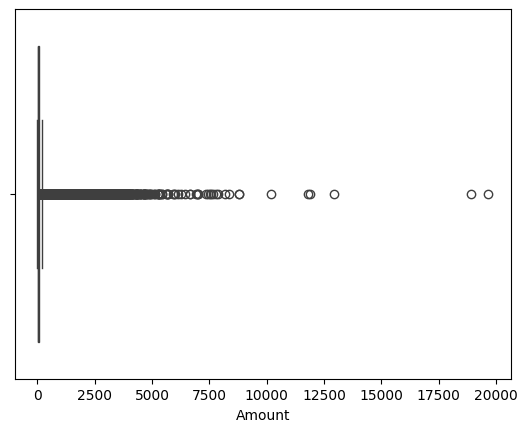

In [ ]:
sns.boxplot(X_train['Amount'], orient = 'h')

Here we can clearly see that there are many outliers and that to be in the right side and it is because of the right skewness

In [ ]:
X_train['Amount'].skew()

14.64128295790354

It can be noticed that the Amount column is mostly right_skewed and we need to normalize the data and to do this we will be using boxcox from scipy

In [ ]:
from scipy.stats import boxcox

In [ ]:
X_train['Amount'] += 0.00000000001

In [ ]:
X_train['Amount'], best_lambda = boxcox(X_train['Amount'])

In [ ]:
best_lambda

0.13554811517415305

<ipython-input-29-1baeed0f21ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.Amount, kde=False)


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

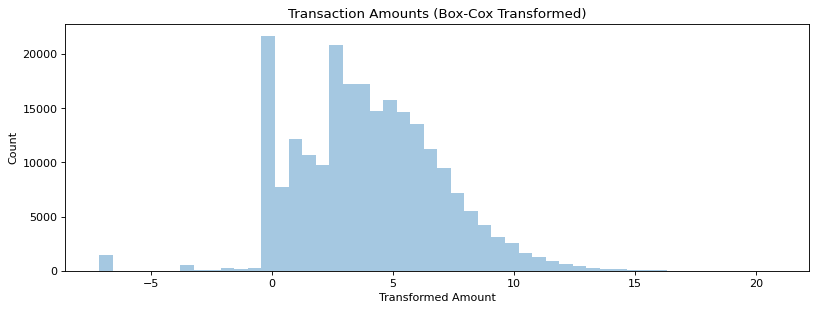

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train.Amount, kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

<Axes: xlabel='Amount'>

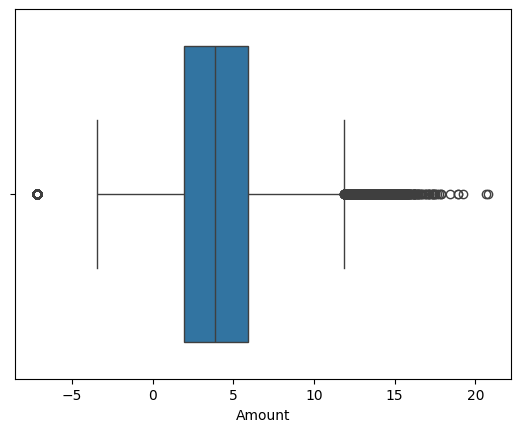

In [ ]:
sns.boxplot(X_train['Amount'], orient = 'h')

In [ ]:
X_train['Amount'].describe()

count    227845.000000
mean          3.996731
std           2.982302
min          -7.139289
25%           1.960690
50%           3.839356
75%           5.929348
max          20.798801
Name: Amount, dtype: float64

In [ ]:
X_train['Amount'].skew()

0.11516311965821437

Now we can clearly see that now the Amount is less skewed. Previously the Skewness value was 14.64 and now the skewness value is 0.115... Huge difference

Now lets check the same thing in test dataset

In [ ]:
X_test['Amount'].skew()

25.225832538849982

In [ ]:
X_test['Amount'].describe()

count    56962.000000
mean        87.227297
std        258.280642
min          0.000000
25%          5.460000
50%         21.940000
75%         76.000000
max      25691.160000
Name: Amount, dtype: float64

In [ ]:
X_test['Amount'] += 0.00000000001

In [ ]:
X_test['Amount'], best_params = boxcox(X_test['Amount'])

In [ ]:
X_test['Amount'].describe()

count    56962.000000
mean         3.976492
std          2.975370
min         -7.131884
25%          1.908875
50%          3.836212
75%          5.894048
max         21.861693
Name: Amount, dtype: float64

<ipython-input-38-682ed6568112>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Amount'], kde = False)


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

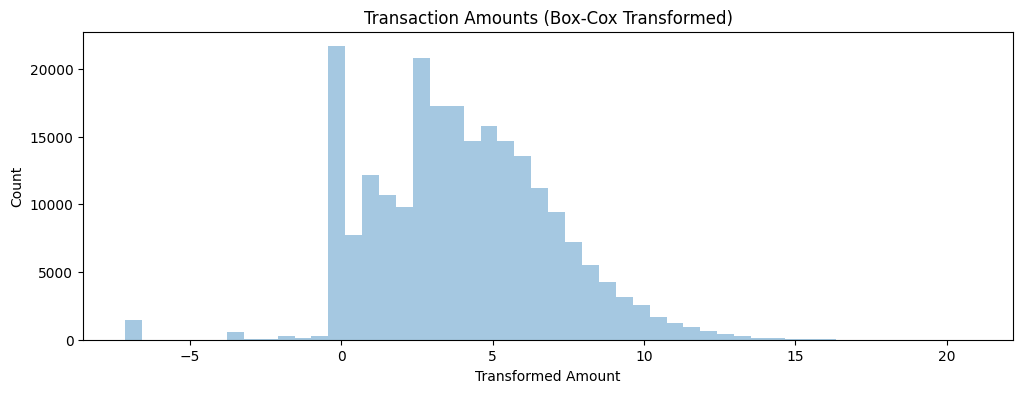

In [ ]:
plt.figure(figsize = (12,4))
sns.distplot(X_train['Amount'], kde = False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [ ]:
X_train['Time'].describe()

count    227845.000000
mean         26.342290
std          13.194639
min           0.000000
25%          15.056111
50%          23.538056
75%          38.704722
max          47.997778
Name: Time, dtype: float64

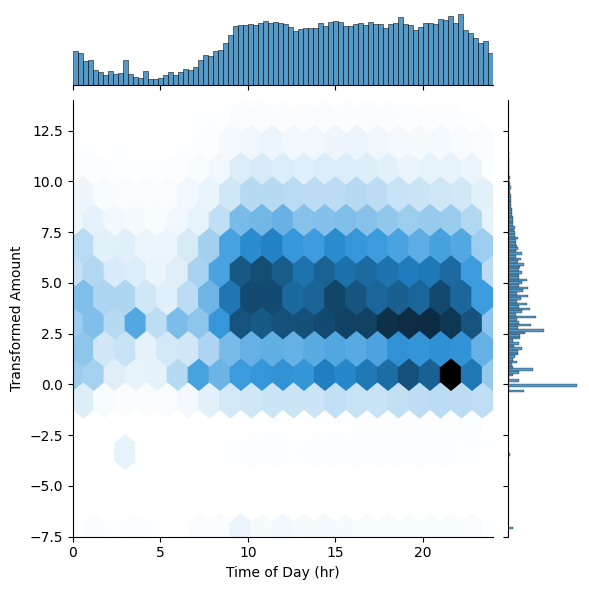

In [ ]:
sns.jointplot(x = X_train.Time.apply(lambda x: x % 24),
              y = X_train.Amount,
              kind='hex',
              xlim=(0,24),
              ylim=(-7.5,14),
              gridsize=20).set_axis_labels('Time of Day (hr)','Transformed Amount')

This shows that most of the transactions are from 10:00 am to 11:30 pm, and also some transactions are occuring in the morning half like say 04:30 to 05:00. It might be the people going for morning walk and having tea or coffee

In [ ]:
y_train['Class'].value_counts()

Class
0    227454
1       391
Name: count, dtype: int64

1 is fraudent and 0 is genuine

getting the indices whose value is 1 i.e., the transactions which are detected fraudent

In [ ]:
filtered_indices = np.where(y_train == 1)[0]

In [ ]:
len(filtered_indices)

391

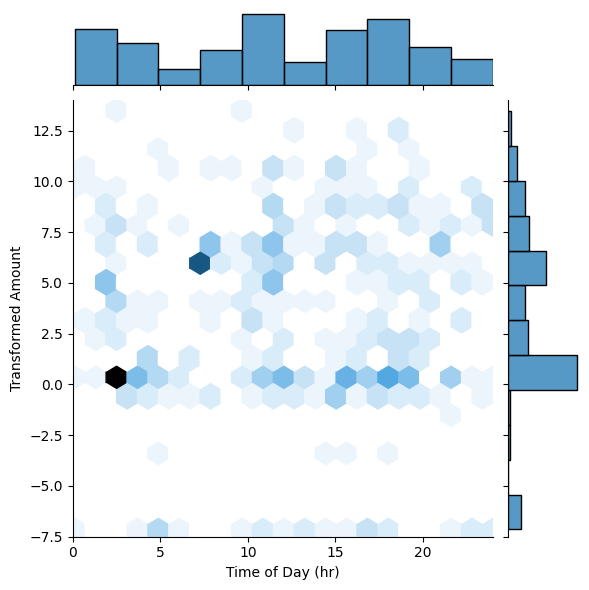

In [ ]:
sns.jointplot(x = X_train.iloc[filtered_indices].Time.apply(lambda x: x % 24),
              y = X_train.iloc[filtered_indices].Amount,
              kind='hex',
              xlim=(0,24),
              ylim=(-7.5,14),
              gridsize=20).set_axis_labels('Time of Day (hr)','Transformed Amount')

We will be going to use the SGDC(Stocasticated Gradient Decent Classifier) model

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

In [ ]:
parameters = {
    'loss' : ['log_loss'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha' : np.logspace(start=-3, stop=3, num=30)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
sgdcgcv = GridSearchCV(sgdc, param_grid = parameters, scoring = 'accuracy', cv = 5)

In [ ]:
y_train = y_train.values

Ravel() is used to flattern the data column i.e., to convert the dimentions from 2D array to 1D array

In [ ]:
y_train = y_train.ravel()

In [ ]:
y_test = y_test.values

In [ ]:
%%time
sgdcgcv.fit(X_train, y_train)

CPU times: user 8min 10s, sys: 45.8 s, total: 8min 55s
Wall time: 8min 12s


GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': array([1.00000000e-03, 1.61026203e-03, 2.59294380e-03, 4.17531894e-03,
       6.72335754e-03, 1.08263673e-02, 1.74332882e-02, 2.80721620e-02,
       4.52035366e-02, 7.27895384e-02, 1.17210230e-01, 1.88739182e-01,
       3.03919538e-01, 4.89390092e-01, 7.88046282e-01, 1.26896100e+00,
       2.04335972e+00, 3.29034456e+00, 5.29831691e+00, 8.53167852e+00,
       1.37382380e+01, 2.21221629e+01, 3.56224789e+01, 5.73615251e+01,
       9.23670857e+01, 1.48735211e+02, 2.39502662e+02, 3.85662042e+02,
       6.21016942e+02, 1.00000000e+03]),
                         'loss': ['log_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [ ]:
sgdcgcv.best_params_

{'alpha': 0.001, 'loss': 'log_loss', 'penalty': 'l2'}

In [ ]:
sgdcgcv.best_score_

0.9991222102745286

In [ ]:
y_pred = sgdcgcv.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score

In [ ]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9991573329588147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56895
           1       0.59      0.90      0.71        67

    accuracy                           1.00     56962
   macro avg       0.80      0.95      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56854    41]
 [    7    60]]


In [ ]:
import pickle
pickle.dump(sgdcgcv, open('model.pkl','wb'))

In [ ]:
model=pickle.load(open('model.pkl','rb'))
print (model.predict (X_test))

[0 0 0 ... 0 0 0]
